# Convolutional Neural Network 

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Launching dataset
import os
os.chdir("/content/drive/My Drive/DS project mask")
Dataset = 'Dataset'
Data_dir = os.listdir(Dataset)
print(Data_dir)

['with_mask', 'without_mask']


In [4]:
!ls

 160930-artificial-intelligence-template-16x9.pptx
'Copy of Untitled0.ipynb'
 data.npy
'data preprocessing.ipynb'
 Dataset
'detecting Masks.ipynb'
 Dev
 DS303_Project.mp4
'DS303_Project_Shreyas(3Layer_64,128,256_3x3Kernal).ipynb'
 ds_project_SDD_2_64layer_3x3kernel.h5
 ds_project_SDD_2layer_3x3kernel.h5
 ds_project_SDD_2layer_5x5kernel.h5
 final_ds_project_SDD_model.model
 haarcascade_frontalface_default.xml
 target.npy
'training the CNN.ipynb'
 Untitled0.ipynb
 Untitled1_TF.ipynb


In [5]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))
#Dense layer of 50 neurons
model.add(Dense(50,activation='relu'))
#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [13]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
#history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

fitted_model=model.fit(train_data,train_target,epochs=20,validation_split=0.25)

Epoch 1/20
29/29 [==============================] - 2s 54ms/step - loss: 0.7174 - accuracy: 0.5160 - val_loss: 0.5838 - val_accuracy: 0.7516
Epoch 2/20
29/29 [==============================] - 1s 49ms/step - loss: 0.5647 - accuracy: 0.7097 - val_loss: 0.4304 - val_accuracy: 0.8387
Epoch 3/20
29/29 [==============================] - 1s 48ms/step - loss: 0.5462 - accuracy: 0.7608 - val_loss: 0.4053 - val_accuracy: 0.8194
Epoch 4/20
29/29 [==============================] - 1s 49ms/step - loss: 0.3101 - accuracy: 0.8936 - val_loss: 0.2505 - val_accuracy: 0.9161
Epoch 5/20
29/29 [==============================] - 1s 48ms/step - loss: 0.2515 - accuracy: 0.9032 - val_loss: 0.1860 - val_accuracy: 0.9419
Epoch 6/20
29/29 [==============================] - 1s 49ms/step - loss: 0.1683 - accuracy: 0.9366 - val_loss: 0.1681 - val_accuracy: 0.9387
Epoch 7/20
29/29 [==============================] - 1s 49ms/step - loss: 0.1249 - accuracy: 0.9611 - val_loss: 0.1258 - val_accuracy: 0.9516
Epoch 8/20
29

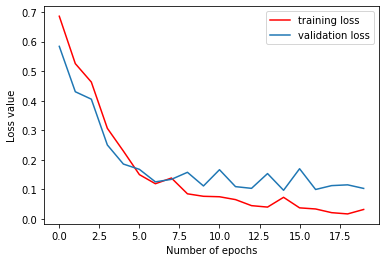

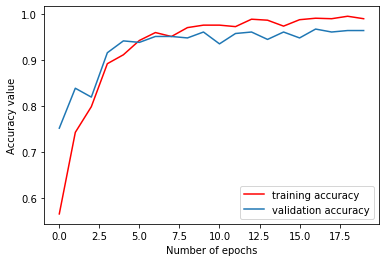

In [14]:
from matplotlib import pyplot as plt

#Plot Training and Validation Loss
plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.ylabel('Loss value')
plt.xlabel('Number of epochs')
plt.legend()
plt.show()

#Plot Training and Validation Loss
plt.plot(fitted_model.history['accuracy'],'r',label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],label='validation accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('Number of epochs')
plt.legend()
plt.show()


In [15]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 20ms/step - loss: 0.2587 - accuracy: 0.9130
[0.25868499279022217, 0.9130434989929199]


In [16]:
model.save('ds_project_SDD_final.h5')